In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 

In [4]:
datos = X.join(y)
datos.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
0,2,12669,9656,7561,214,2674,1338,3
1,2,7057,9810,9568,1762,3293,1776,3
2,2,6353,8808,7684,2405,3516,7844,3
3,1,13265,1196,4221,6404,507,1788,3
4,2,22615,5410,7198,3915,1777,5185,3


In [5]:
datos.isna().sum()

Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Region              0
dtype: int64

In [6]:
from sklearn.cluster import KMeans

In [12]:
resultados = {}
cluster_max = 15

for k in range(2, cluster_max+1):
    print("Ejecutando con K =", k)
    model = KMeans(n_clusters = k)
    model.fit(datos)
    resultados[k] = (model, model.inertia_)

Ejecutando con K = 2
Ejecutando con K = 3
Ejecutando con K = 4
Ejecutando con K = 5
Ejecutando con K = 6
Ejecutando con K = 7
Ejecutando con K = 8
Ejecutando con K = 9
Ejecutando con K = 10
Ejecutando con K = 11
Ejecutando con K = 12
Ejecutando con K = 13
Ejecutando con K = 14
Ejecutando con K = 15


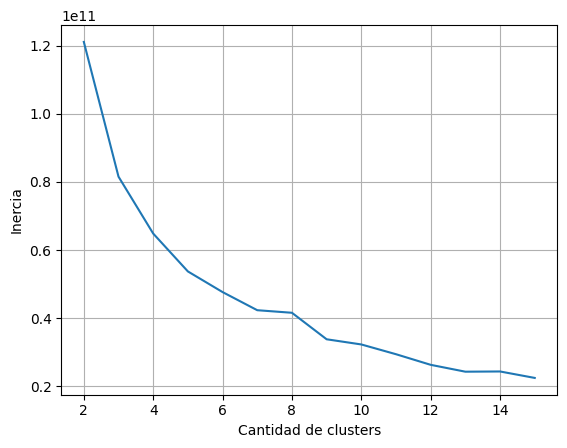

In [13]:
fig = plt.figure()
plt.plot(range(2, cluster_max+1), [e[1] for e in resultados.values()])
plt.xlabel("Cantidad de clusters")
plt.ylabel("Inercia")
plt.grid(True)

In [14]:
model,inertia = resultados[6]
print(model,inertia)

KMeans(n_clusters=6) 47690114917.23287


In [16]:
datos['cluster'] = model.labels_
datos.head(n=15)

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,cluster
0,2,12669,9656,7561,214,2674,1338,3,4
1,2,7057,9810,9568,1762,3293,1776,3,0
2,2,6353,8808,7684,2405,3516,7844,3,0
3,1,13265,1196,4221,6404,507,1788,3,4
4,2,22615,5410,7198,3915,1777,5185,3,4
5,2,9413,8259,5126,666,1795,1451,3,0
6,2,12126,3199,6975,480,3140,545,3,4
7,2,7579,4956,9426,1669,3321,2566,3,0
8,1,5963,3648,6192,425,1716,750,3,0
9,2,6006,11093,18881,1159,7425,2098,3,3


In [18]:
resumen = datos.groupby('cluster').mean().round(2)
resumen

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
cluster,,,,,,,,
0,1.22,4977.17,3797.35,4830.81,2280.54,1666.49,997.33,2.54
1,1.09,38340.51,6174.37,6011.40,7806.23,787.86,3531.40,2.60
2,2.00,25603.00,43460.60,61472.20,2636.00,29974.20,2708.80,2.80
3,1.94,5332.75,13649.11,21231.78,1680.72,9294.92,2011.33,2.42
4,1.23,17928.54,3308.85,4626.23,3582.96,1117.47,1506.42,2.58
5,1.00,85779.67,12503.67,12619.67,13991.67,2159.00,3958.00,3.00


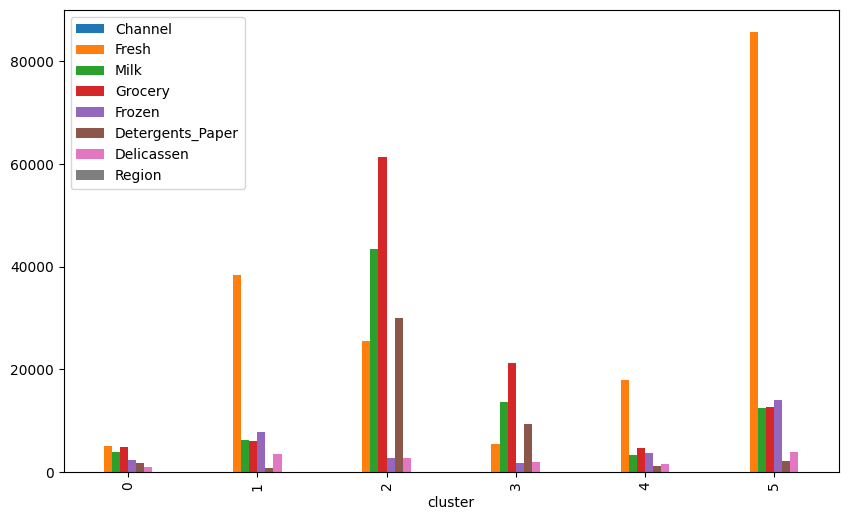

In [22]:
resumen.plot.bar(figsize=(10,6));

In [23]:
normalizado = (resumen - resumen.min()) / (resumen.max() - resumen.min())

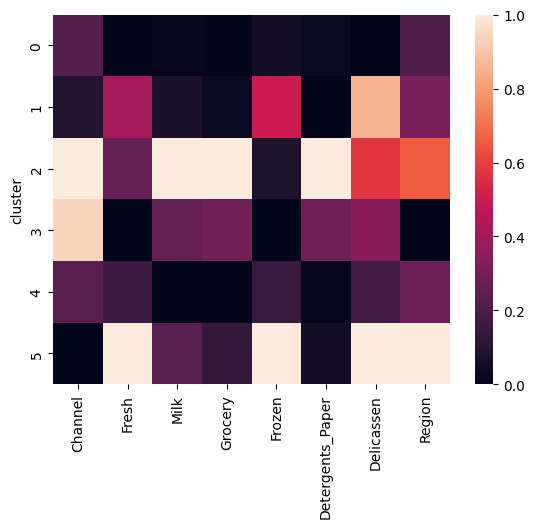

In [24]:
import seaborn as sns
sns.heatmap(normalizado);

In [25]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))